# Scaling Exercises

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wrangle as w
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()

In [3]:
train, validate, test = w.split_zillow_data(df)

In [4]:
train.shape

(1172925, 7)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172925 entries, 1113544 to 1674693
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1172925 non-null  int64  
 1   bathrooms   1172925 non-null  float64
 2   sq_feet     1172925 non-null  int64  
 3   tax_value   1172925 non-null  int64  
 4   year_built  1172925 non-null  int64  
 5   tax_amount  1172925 non-null  float64
 6   fips        1172925 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 71.6 MB


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [6]:
train_scaled = train.copy()

In [7]:
# make, fit, use:
columns_to_scale = ['bedrooms', 'bathrooms','tax_amount', 'sq_feet']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [8]:
train.columns

Index(['bedrooms', 'bathrooms', 'sq_feet', 'tax_value', 'year_built',
       'tax_amount', 'fips'],
      dtype='object')

In [9]:
train_scaled.head(2)

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
1113544,0.333333,0.333333,0.194150,825572,1951,0.099467,6037
1301161,0.666667,0.333333,0.150836,313005,1968,0.044321,6037


Text(0, 0.5, 'Count')

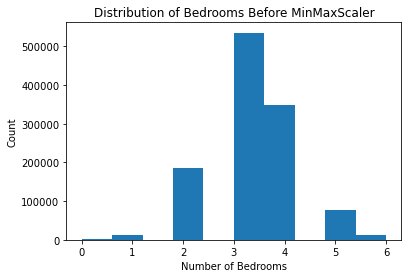

In [10]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

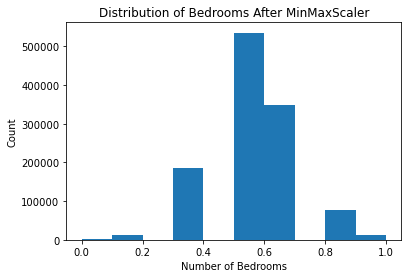

In [11]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [12]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

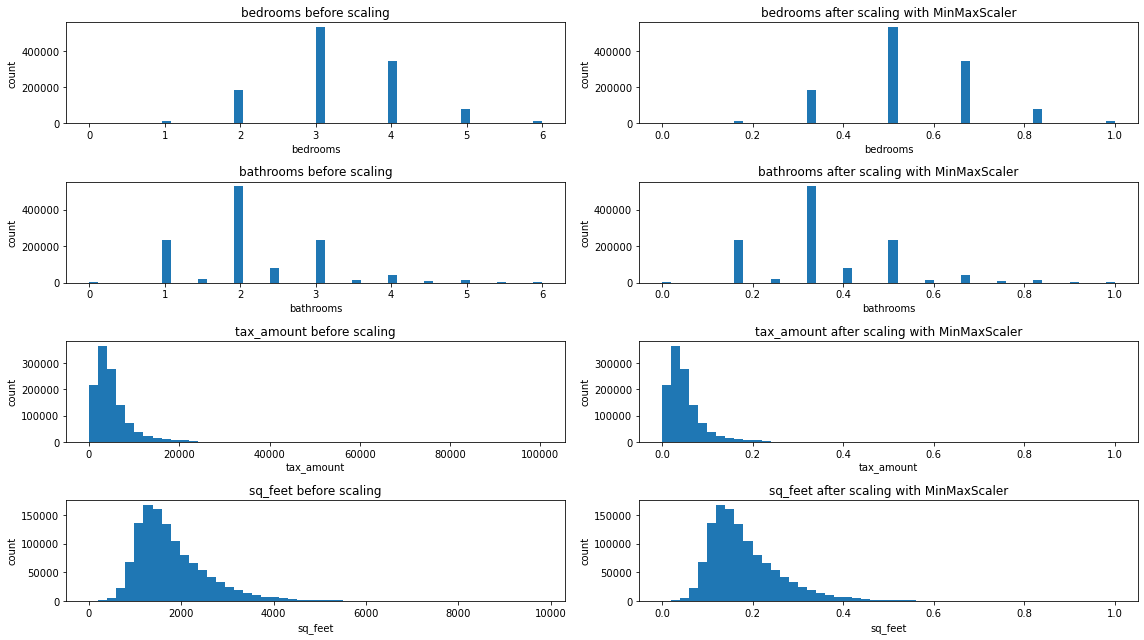

In [13]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

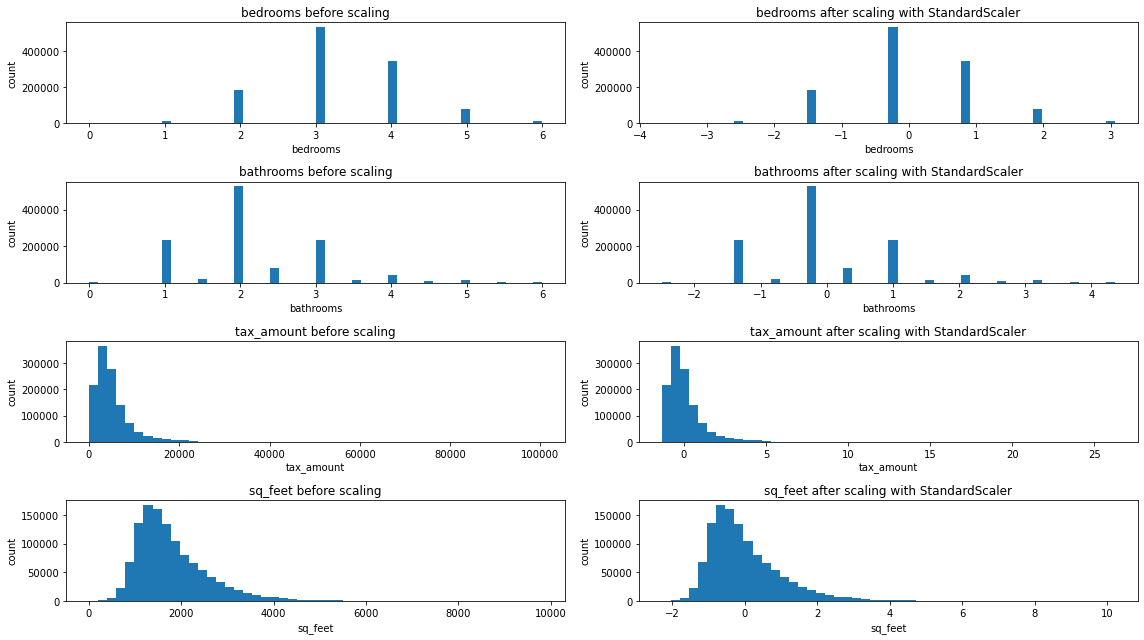

In [14]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

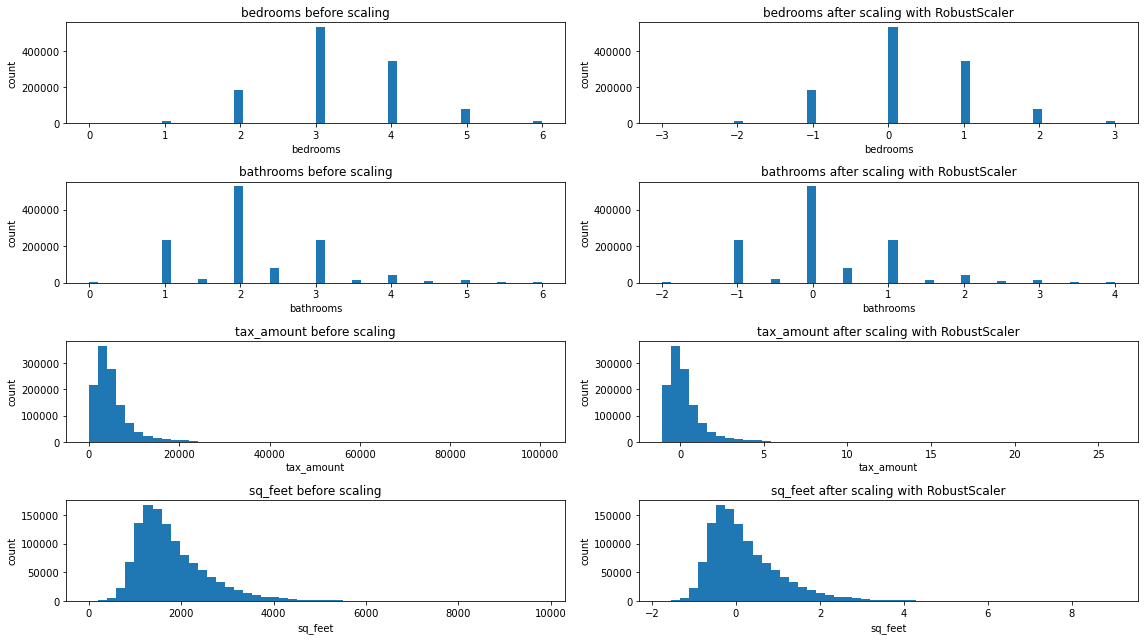

In [15]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [16]:
scaler = MinMaxScaler()
original_data = train[['tax_amount']]
scaled_data = scaler.fit_transform(original_data)

In [17]:
scaled_data[:5]

array([[0.09946747],
       [0.04432139],
       [0.05668963],
       [0.03189497],
       [0.03197119]])

In [18]:
original_data[:5]

,tax_amount
1113544,9996.51
1301161,4461.72
1609877,5703.07
1431804,3214.53
138504,3222.18


In [19]:
scaler.inverse_transform(scaled_data)[:5]

array([[9996.51],
       [4461.72],
       [5703.07],
       [3214.53],
       [3222.18]])

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

**From sklearn.preprocessing.QuantileTransformer documentation:**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

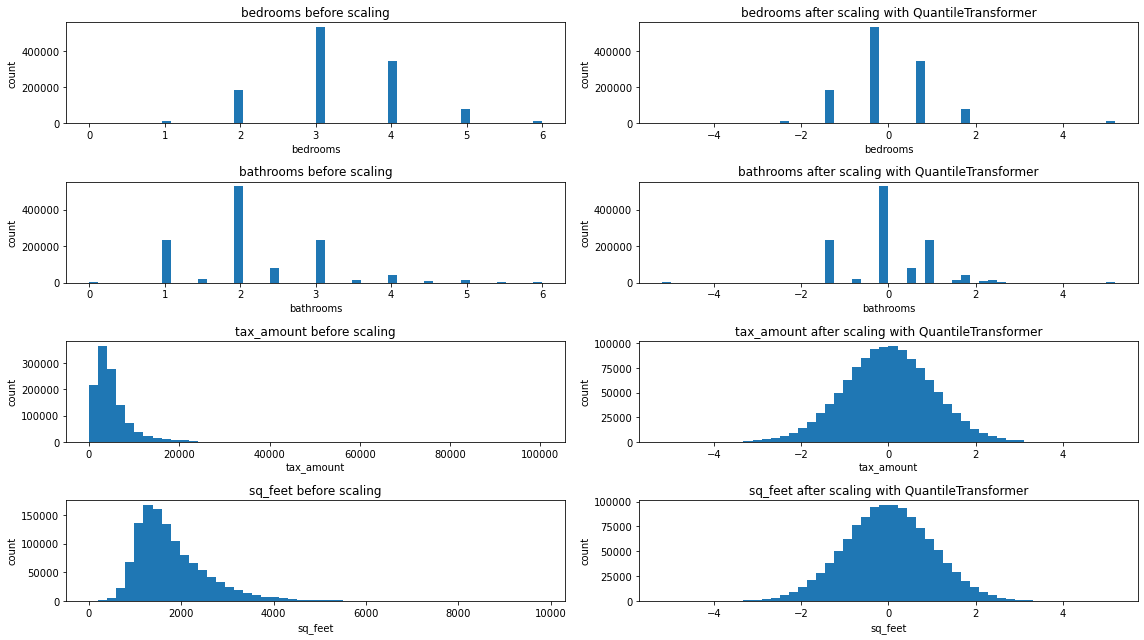

In [20]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), 
                 df=train,
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

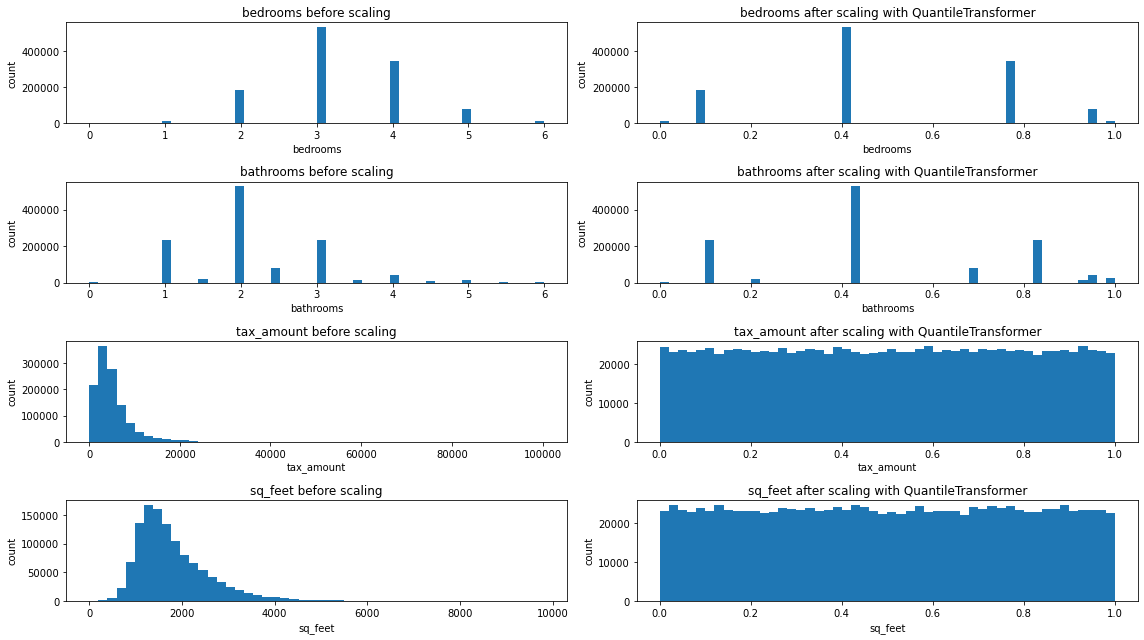

In [21]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your wrangle.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. 

### Creating a Pipeline Function

In [22]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'tax_amount', 'sq_feet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [23]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [27]:
scaler

MinMaxScaler()

In [24]:
train_scaled

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
1113544,0.333333,0.333333,0.194150,825572,1951,0.099467,6037
1301161,0.666667,0.333333,0.150836,313005,1968,0.044321,6037
1609877,0.666667,0.500000,0.217693,459841,1987,0.056690,6037
1431804,0.500000,0.166667,0.103445,250021,1957,0.031895,6037
138504,0.500000,0.500000,0.195577,282000,1988,0.031971,6037
...,...,...,...,...,...,...,...
1309513,0.500000,0.500000,0.248369,163556,2005,0.030534,6037
133345,0.500000,0.416667,0.191194,212849,1966,0.024853,6059
550414,0.666667,0.333333,0.168671,342802,1964,0.046927,6037
967029,0.500000,0.333333,0.386058,1668587,1941,0.200676,6037


In [25]:
validate_scaled

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
793315,0.666667,0.583333,0.342234,728377,1984,0.073506,6059
1623302,0.666667,0.500000,0.244598,549617,2008,0.055331,6059
1934028,0.500000,0.166667,0.105993,220911,1956,0.027514,6037
1421128,0.666667,0.333333,0.155422,68500,1956,0.010417,6037
264181,0.666667,0.500000,0.219731,249653,1994,0.038484,6037
...,...,...,...,...,...,...,...
1335994,0.333333,0.166667,0.117102,579913,1938,0.002432,6037
779324,0.666667,0.833333,0.188443,1352303,1964,0.161737,6037
2002422,0.500000,0.500000,0.281696,318326,1978,0.044326,6037
791255,0.333333,0.333333,0.144619,781742,1922,0.091814,6037


In [26]:
test_scaled

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
925882,0.500000,0.666667,0.240929,1171493,1938,0.140865,6037
49443,0.666667,0.500000,0.171728,241740,1922,0.030261,6059
357605,0.500000,0.333333,0.285569,302254,1978,0.038208,6037
1409658,0.500000,0.333333,0.123930,262479,1922,0.032684,6037
980249,0.333333,0.166667,0.101406,468060,1925,0.057263,6037
...,...,...,...,...,...,...,...
676977,0.500000,0.333333,0.147065,48407,1951,0.009153,6037
1134901,0.500000,0.333333,0.117815,259603,1961,0.034655,6037
1940211,0.500000,0.333333,0.161639,1007667,1950,0.111384,6037
50843,0.500000,0.333333,0.149511,161016,1950,0.020861,6059
